### Data Analysis Workflow

In [4]:
import sys
import pandas as pd

scripts_dir = r'C:\Users\fikad\Desktop\10acedamy\Brent_OilPrice_Dashboard\script'
data_path = r'C:\Users\fikad\Desktop\10acedamy\Brent_OilPrice_Dashboard\Data\merged_brent_events.csv'

if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

from eda_utils import eda_analysis
from timeseries_analysis import time_series_decomposition, arima_model, detect_change_points_l2, detect_change_points_rbf, cusum_analysis, bayesian_change_point_detection

pd.set_option('display.colheader_justify', 'right')

### Load Merged Data

In [5]:
merged_data = pd.read_csv(data_path)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
print("Merged Data Preview:".rjust(30))
print(merged_data.head(2).to_string(justify='right'))


          Merged Data Preview:
        Date  Price Event_Type Event_Description   Returns
0 1987-05-20  18.63        NaN               NaN       NaN
1 1987-05-21  18.45        NaN               NaN -0.966184


### EDA

    Exploratory Data Analysis:
               Missing Values:
Event_Type           7979
Event_Description    7979
Returns                 1
           Summary Statistics:
             Price      Returns
count  8360.000000  8359.000000
mean     46.459669     0.021820
std      32.504671     2.431979
min       9.100000   -47.465438
25%      18.780000    -1.109080
50%      31.750000     0.008894
75%      67.042500     1.185547
max     143.950000    35.203741


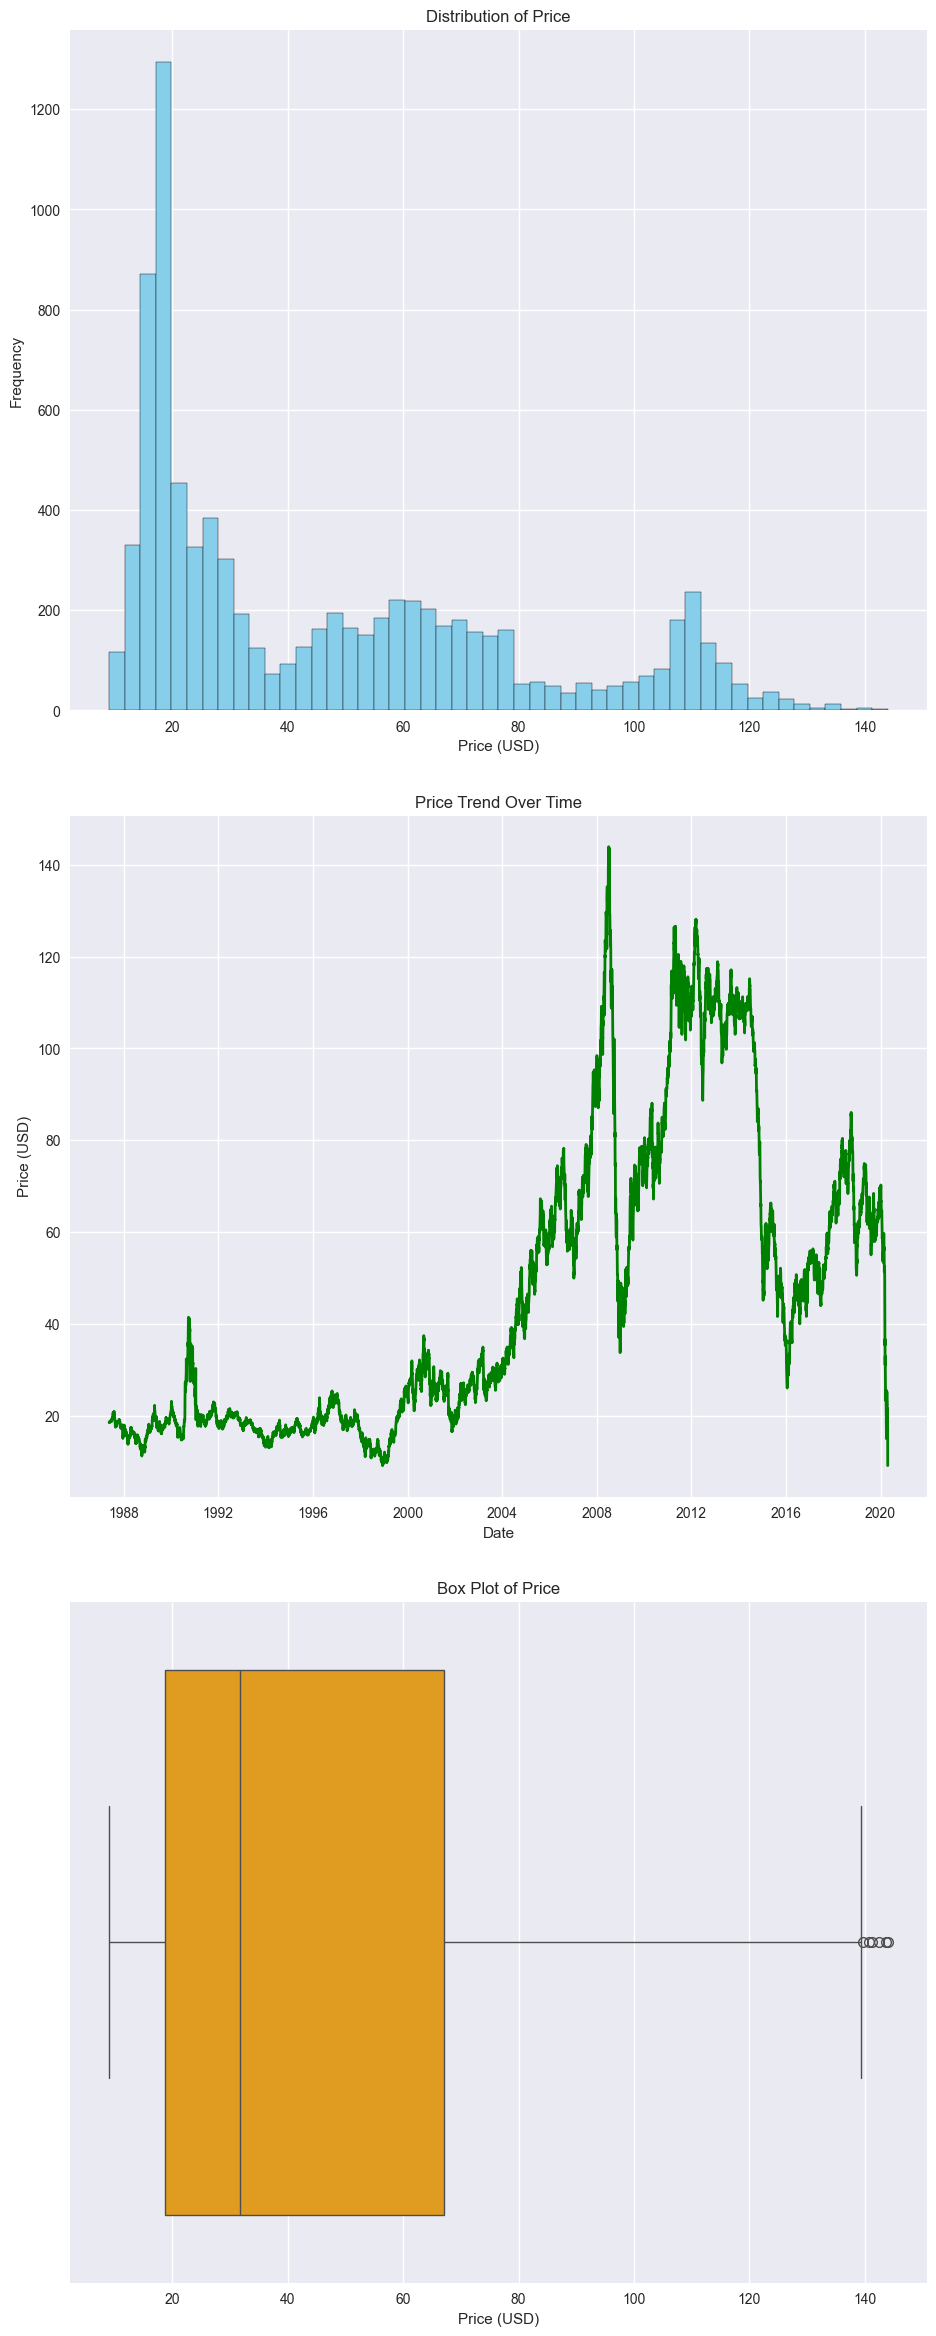

In [6]:
print("Exploratory Data Analysis:".rjust(30))
eda_analysis(merged_data, columns=['Price', 'Returns'])

### Time Series Decomposition

    Time Series Decomposition:


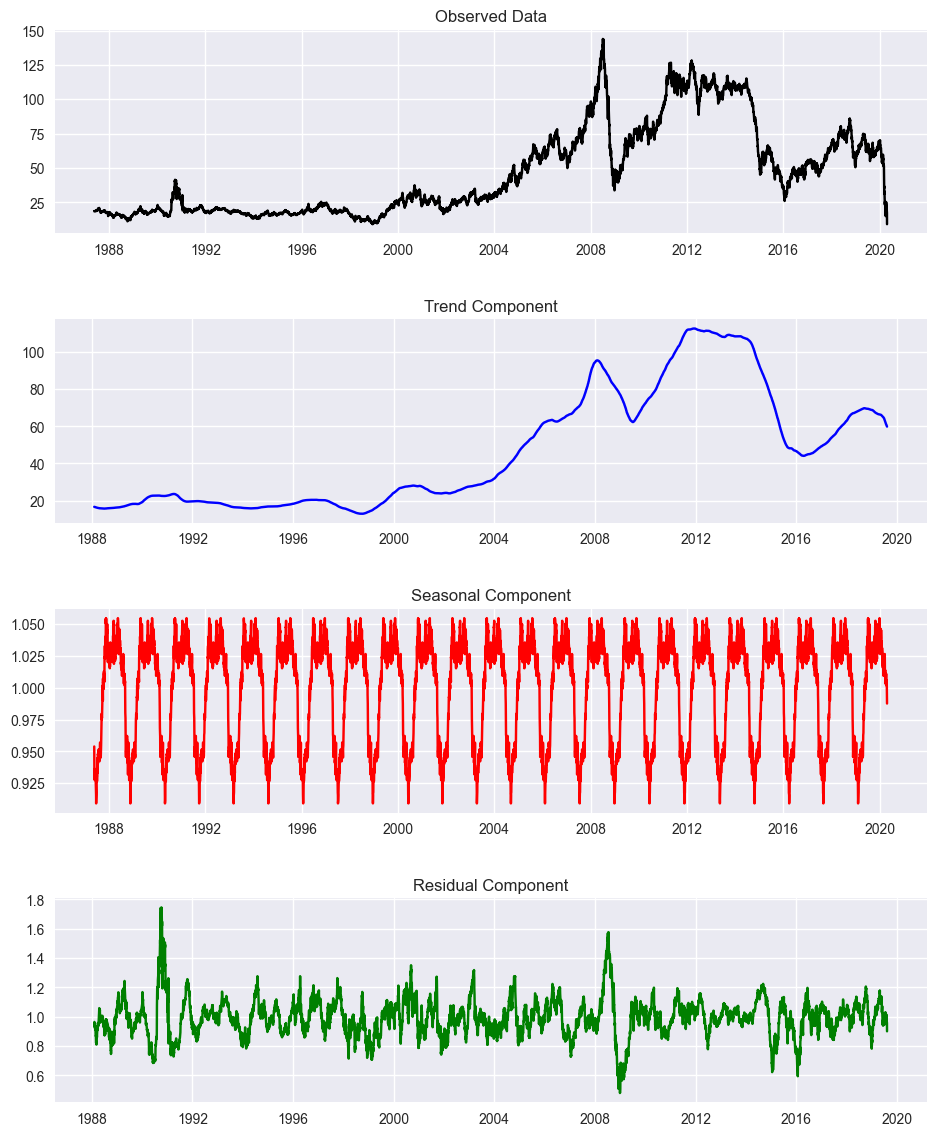

In [7]:
print("Time Series Decomposition:".rjust(30))
decomposition = time_series_decomposition(merged_data, period=365)

### ARIMA Modeling

               ARIMA Modeling:
          ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8360
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12634.384
Date:                Tue, 25 Feb 2025   AIC                          25274.768
Time:                        06:09:38   BIC                          25295.862
Sample:                             0   HQIC                         25281.973
                               - 8360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2291      0.214     -1.073      0.283      -0.648       0.190
ma.L1          0.2591      0.212      1.223      0.221      -0.156   

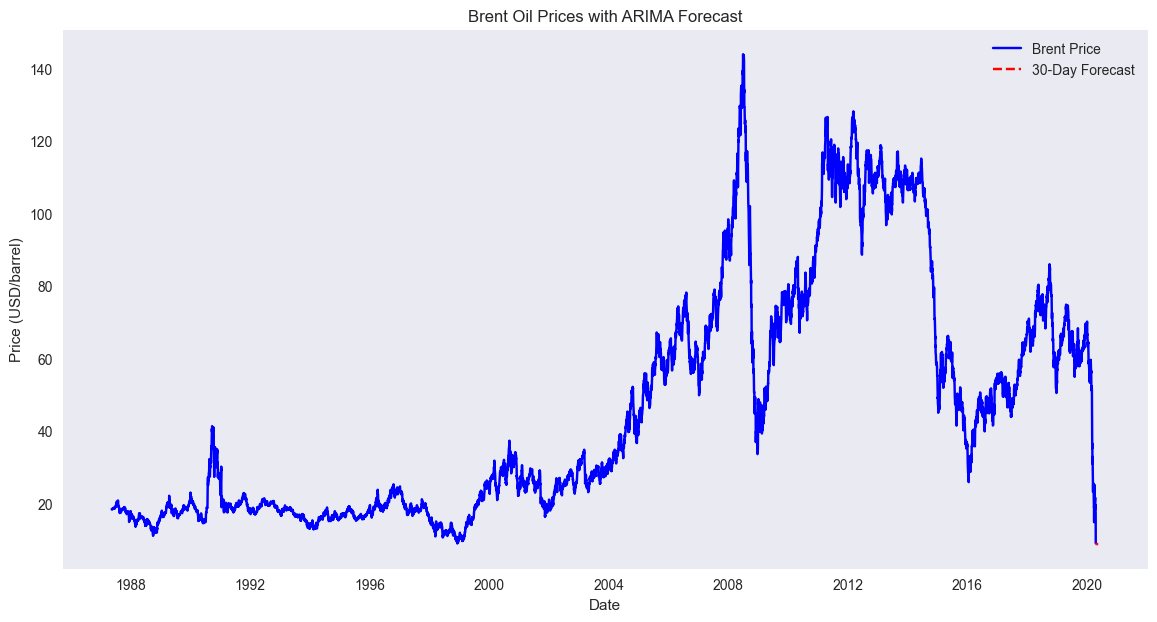

In [8]:
print("ARIMA Modeling:".rjust(30))
arima_results, forecast_df = arima_model(merged_data, order=(1, 1, 1), forecast_steps=30)

### Change Point Detection

### Comprehensive Visualization

### Comprehensive Visualization

c:\Users\fikad\Desktop\10acedamy\Brent_OilPrice_Dashboard\week_10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


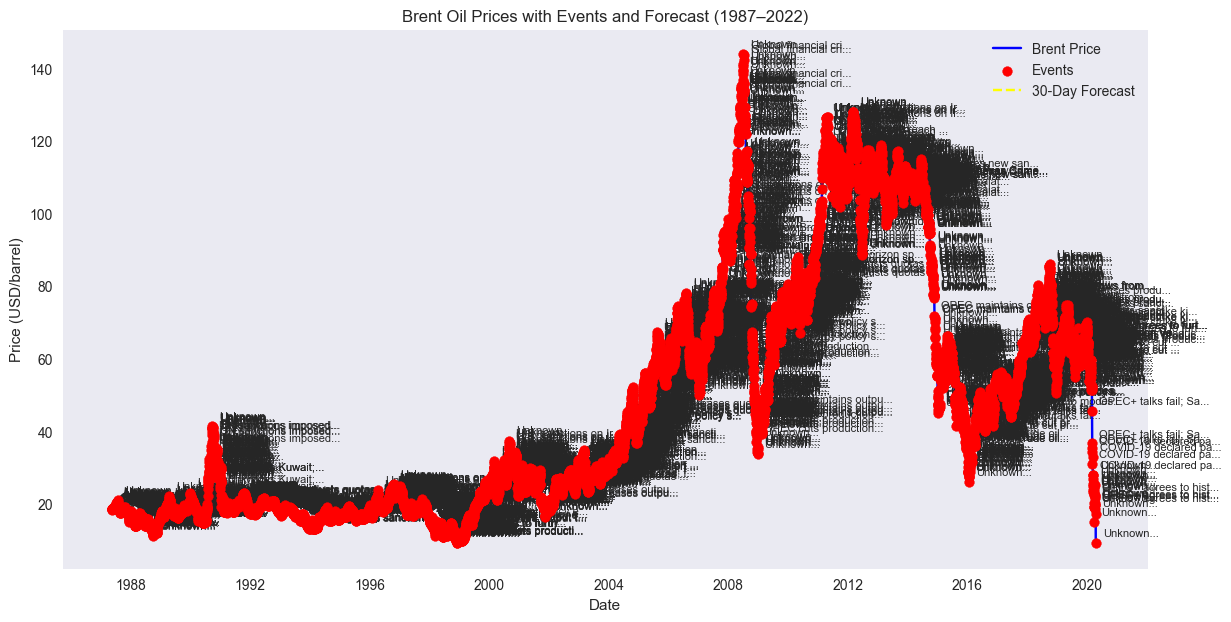

In [11]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Price', color='blue')
event_days = merged_data[merged_data['Event_Type'] != 'None'].copy()  # Create a copy to avoid SettingWithCopyWarning
event_days['Event_Description'] = event_days['Event_Description'].fillna('Unknown').astype(str)  # Ensure strings
plt.scatter(event_days['Date'], event_days['Price'], color='red', label='Events', zorder=5)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], color='yellow', label='30-Day Forecast', linestyle='--')
for i, txt in enumerate(event_days['Event_Description']):
    plt.annotate(txt[:20] + "...", (event_days['Date'].iloc[i], event_days['Price'].iloc[i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.title('Brent Oil Prices with Events and Forecast (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()